In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import datetime
from datetime import date, timedelta
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt 

In [3]:
url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
    'start' : '1', 
    'limit' : '100',
    'convert' : 'EUR'
}

headers = {
    'Accepts':'application/json',
    'X-CMC_PRO_API_KEY':'8e838aff-5d2b-45bd-b1eb-e944ed6c430e'
}

session = Session()
session.headers.update(headers)

try:
    response = session.get(url, params=parameters)
#     print(response)
    data = json.loads(response.text)
    print(data)
    today = date.today()
    yesterday = str(today-timedelta(days=1))
    yesterday_datetime= datetime.datetime.strptime(yesterday, '%Y-%m-%d')
#     print(yesterday_datetime)
#     there are two keys 'status' and 'data'
    for entry in data["data"]:
        symbol = entry["symbol"]
#         print(symbol)
#       gets only the date at string
        date_added_str = entry["date_added"][:10]
#         print(date_added_str)
        #converting to datetime for comparison
        date_added = datetime.datetime.strptime(date_added_str, '%Y-%m-%d')
#         print(date_added)
        if yesterday_datetime < date_added:
            print(symbol + ": " + date_added_str)
        else:
            pass
#     print(data)
    
except (ConnectionError, Timeout, TooManyRedirects) as e:
    print(e)

{'status': {'timestamp': '2022-06-12T18:37:03.810Z', 'error_code': 0, 'error_message': None, 'elapsed': 43, 'credit_count': 1, 'notice': None, 'total_count': 9988}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9528, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'parad

In [4]:
with open('crypto_data_1st_June.json', 'w') as f:
    json.dump(data, f)

In [5]:
json_data = json.load(open('crypto_data_1st_June.json'))
df = pd.DataFrame(json_data["data"])
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,last_updated,quote
0,1,Bitcoin,BTC,bitcoin,9528,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.906569e+07,1.906569e+07,None,1,NaN,NaN,2022-06-12T18:36:00.000Z,"{'EUR': {'price': 26591.96792948629, 'volume_2..."
1,1027,Ethereum,ETH,ethereum,5745,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,1.211473e+08,1.211473e+08,None,2,NaN,NaN,2022-06-12T18:35:00.000Z,"{'EUR': {'price': 1441.3721778853355, 'volume_..."
2,825,Tether,USDT,tether,34602,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,7.249498e+10,7.971062e+10,"{'id': 1027, 'name': 'Ethereum', 'symbol': 'ET...",3,NaN,NaN,2022-06-12T18:35:00.000Z,"{'EUR': {'price': 0.94970777913866, 'volume_24..."
3,3408,USD Coin,USDC,usd-coin,4383,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,5.396875e+10,5.396875e+10,"{'id': 1027, 'name': 'Ethereum', 'symbol': 'ET...",4,NaN,NaN,2022-06-12T18:35:00.000Z,"{'EUR': {'price': 0.950528661142996, 'volume_2..."
4,1839,BNB,BNB,bnb,947,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",1.651168e+08,1.632770e+08,1.632770e+08,None,5,NaN,NaN,2022-06-12T18:35:00.000Z,"{'EUR': {'price': 252.3953529409346, 'volume_2..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2083,Bitcoin Gold,BTG,bitcoin-gold,67,2017-10-23T00:00:00.000Z,"[mineable, medium-of-exchange, payments]",2.100000e+07,1.751392e+07,1.751392e+07,None,96,NaN,NaN,2022-06-12T18:36:00.000Z,"{'EUR': {'price': 17.46070982609125, 'volume_2..."
96,1808,OMG Network,OMG,omg,288,2017-07-14T00:00:00.000Z,"[medium-of-exchange, payments, scaling, state-...",1.402454e+08,1.402454e+08,1.402454e+08,"{'id': 1027, 'name': 'Ethereum', 'symbol': 'ET...",97,NaN,NaN,2022-06-12T18:35:00.000Z,"{'EUR': {'price': 2.1586492847966134, 'volume_..."
97,5692,Compound,COMP,compound,269,2020-06-16T00:00:00.000Z,"[defi, dao, yield-farming, polkadot-ecosystem,...",1.000000e+07,7.138876e+06,1.000000e+07,"{'id': 1027, 'name': 'Ethereum', 'symbol': 'ET...",98,NaN,NaN,2022-06-12T18:35:00.000Z,"{'EUR': {'price': 41.933099644407704, 'volume_..."
98,6836,Moonbeam,GLMR,moonbeam,40,2022-01-11T12:55:50.000Z,"[smart-contracts, substrate, polkadot, polkado...",1.000000e+09,2.974676e+08,1.017950e+09,None,99,1.868967e+06,1.949526e+06,2022-06-12T18:35:00.000Z,"{'EUR': {'price': 0.9915432429941151, 'volume_..."


In [7]:
coincap_df = pd.concat([df.drop(['quote'], axis=1), pd.json_normalize(df['quote'])],axis=1)

In [8]:
coincap_df.columns

Index(['id', 'name', 'symbol', 'slug', 'num_market_pairs', 'date_added',
       'tags', 'max_supply', 'circulating_supply', 'total_supply', 'platform',
       'cmc_rank', 'self_reported_circulating_supply',
       'self_reported_market_cap', 'last_updated', 'EUR.price',
       'EUR.volume_24h', 'EUR.volume_change_24h', 'EUR.percent_change_1h',
       'EUR.percent_change_24h', 'EUR.percent_change_7d',
       'EUR.percent_change_30d', 'EUR.percent_change_60d',
       'EUR.percent_change_90d', 'EUR.market_cap', 'EUR.market_cap_dominance',
       'EUR.fully_diluted_market_cap', 'EUR.last_updated'],
      dtype='object')

In [9]:
coincap_df = coincap_df.drop(['platform'],axis=1)
coincap_df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,EUR.percent_change_1h,EUR.percent_change_24h,EUR.percent_change_7d,EUR.percent_change_30d,EUR.percent_change_60d,EUR.percent_change_90d,EUR.market_cap,EUR.market_cap_dominance,EUR.fully_diluted_market_cap,EUR.last_updated
0,1,Bitcoin,BTC,bitcoin,9528,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.906569e+07,1.906569e+07,...,-0.592666,-2.705645,-8.261834,-5.776646,-32.071816,-27.531681,5.069941e+11,47.3854,5.584313e+11,2022-06-12T18:35:52.000Z
1,1027,Ethereum,ETH,ethereum,5745,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,1.211473e+08,1.211473e+08,...,-0.310805,-2.087749,-17.984847,-26.164216,-50.990855,-39.988583,1.746183e+11,16.3868,1.746183e+11,2022-06-12T18:35:52.000Z
2,825,Tether,USDT,tether,34602,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,7.249498e+10,7.971062e+10,...,-0.154616,-0.714947,-1.594156,0.031229,-0.109367,-0.117587,6.884905e+10,6.4610,7.570180e+10,2022-06-12T18:35:52.000Z
3,3408,USD Coin,USDC,usd-coin,4383,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,5.396875e+10,5.396875e+10,...,-0.218868,-0.735392,-1.598450,-0.028514,0.054411,0.016992,5.129884e+10,4.8141,5.129884e+10,2022-06-12T18:35:52.000Z
4,1839,BNB,BNB,bnb,947,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",1.651168e+08,1.632770e+08,1.632770e+08,...,-0.849980,-2.818713,-13.091458,-9.401172,-36.652655,-27.249519,4.121035e+10,3.8673,4.167470e+10,2022-06-12T18:35:52.000Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2083,Bitcoin Gold,BTG,bitcoin-gold,67,2017-10-23T00:00:00.000Z,"[mineable, medium-of-exchange, payments]",2.100000e+07,1.751392e+07,1.751392e+07,...,-0.819280,-4.868451,-17.668773,-2.572344,-48.288960,-35.733503,3.058055e+08,0.0286,3.666749e+08,2022-06-12T18:35:52.000Z
96,1808,OMG Network,OMG,omg,288,2017-07-14T00:00:00.000Z,"[medium-of-exchange, payments, scaling, state-...",1.402454e+08,1.402454e+08,1.402454e+08,...,-1.525878,-2.378241,-9.841373,-10.121368,-50.840490,-41.537898,3.027406e+08,0.0284,3.027406e+08,2022-06-12T18:35:52.000Z
97,5692,Compound,COMP,compound,269,2020-06-16T00:00:00.000Z,"[defi, dao, yield-farming, polkadot-ecosystem,...",1.000000e+07,7.138876e+06,1.000000e+07,...,-1.595667,-4.146858,-25.672192,-35.442442,-70.057344,-55.473884,2.993552e+08,0.0281,4.193310e+08,2022-06-12T18:35:52.000Z
98,6836,Moonbeam,GLMR,moonbeam,40,2022-01-11T12:55:50.000Z,"[smart-contracts, substrate, polkadot, polkado...",1.000000e+09,2.974676e+08,1.017950e+09,...,-0.437848,-3.585981,-24.146911,-15.998883,-73.244624,-53.027132,2.949520e+08,0.0277,9.915432e+08,2022-06-12T18:35:52.000Z


In [26]:
coincap_df.to_csv("E:\Pranshu\MS_Colleges\SRH_Hiedelberg\Semester_2\Data_Engineering_2\Coin_Market_Cap\Docker\coincap.csv")


### 1 hour change%

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

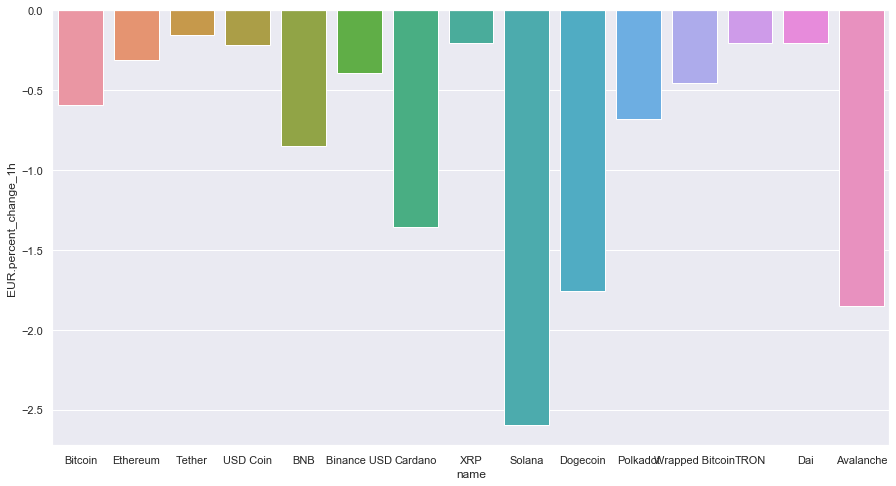

In [32]:
#Top 15 Crytocurrencies 
sns.set(rc = {'figure.figsize':(15,8)})
sns.barplot(x = coincap_df['name'][:15], y = coincap_df['EUR.percent_change_1h'])
plt.show()

### 24 Hours Change %

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

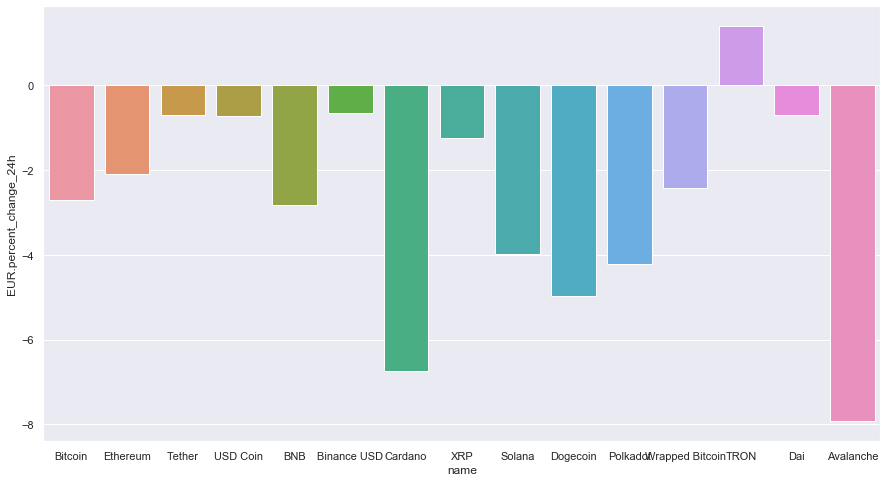

In [33]:
#
sns.set(rc = {'figure.figsize':(15,8)})
sns.barplot(x = coincap_df['name'][:15], y = coincap_df['EUR.percent_change_24h'])
plt.show()

### 7 Days change %

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

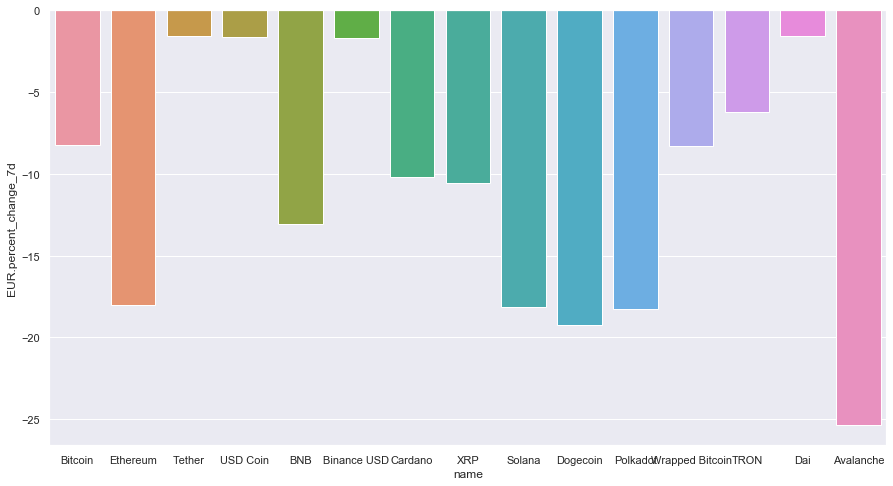

In [34]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.barplot(x = coincap_df['name'][:15], y = coincap_df['EUR.percent_change_7d'],ci=68)
plt.show()

### 30 Days change %

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

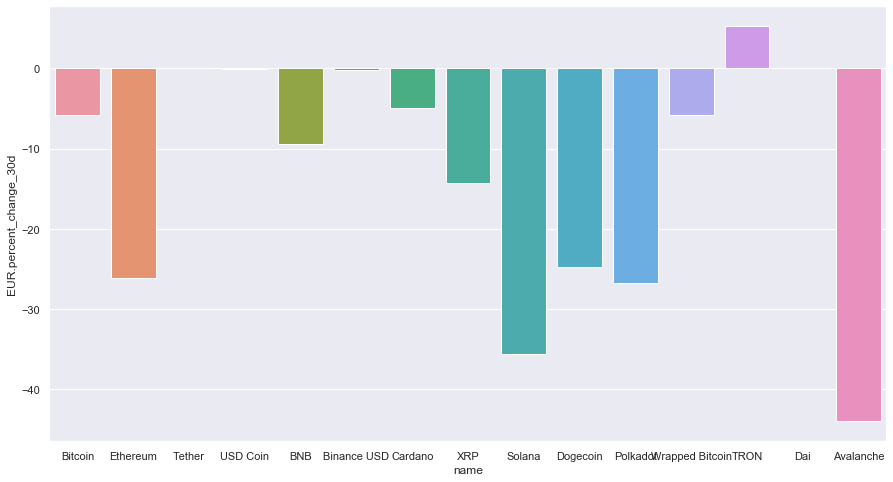

In [35]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.barplot(x = coincap_df['name'][:15], y = coincap_df['EUR.percent_change_30d'],ci=68)
plt.show()

### 60 Days change %

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

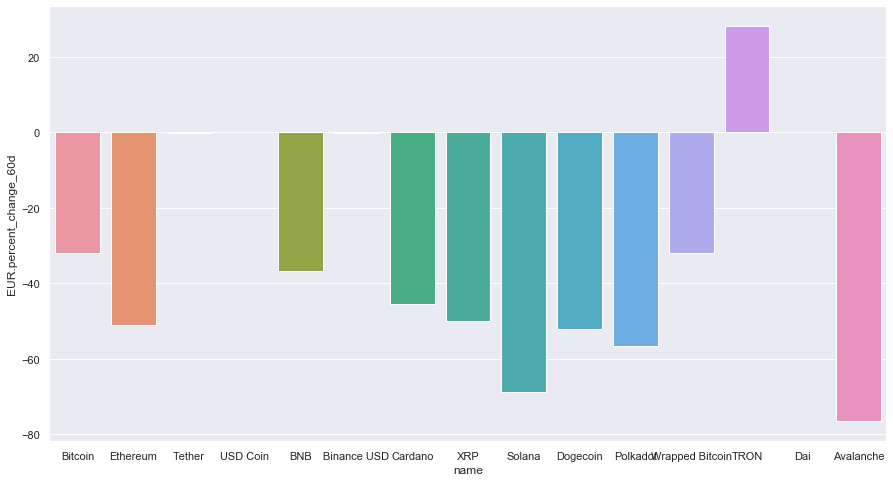

In [36]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.barplot(x = coincap_df['name'][:15], y = coincap_df['EUR.percent_change_60d'],ci=68)
plt.show()

### 90 Days change %

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

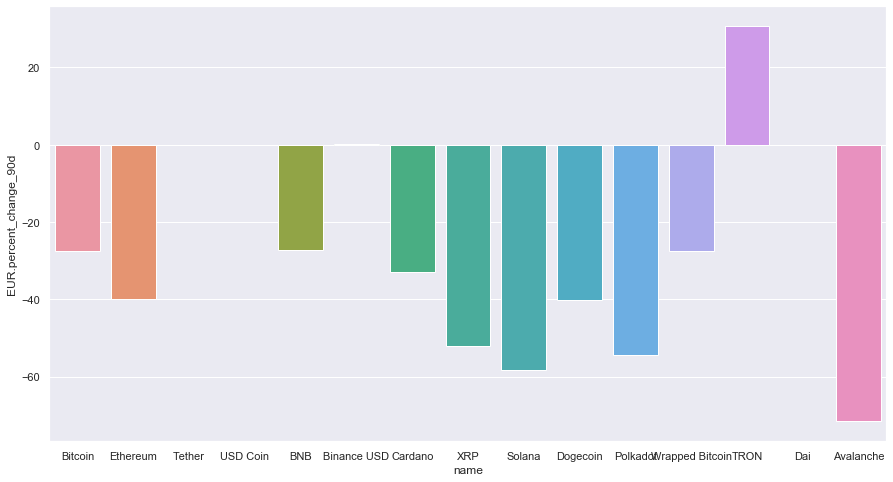

In [37]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.barplot(x = coincap_df['name'][:15], y = coincap_df['EUR.percent_change_90d'],ci=68)
plt.show()